# Sales file

In [4]:
!pip install squarify

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from datetime import datetime
import squarify
from sqlalchemy import create_engine

In [6]:
data = pd.read_csv("Sales.csv")

In [7]:
data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,01-01-2016,NaN,265598,10,1304,1,CAD
1,366001,1,01-01-2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,01-01-2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,01-01-2016,01-12-2016,266019,0,1106,7,CAD
4,366002,2,01-01-2016,01-12-2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [8]:
data.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [9]:
data.isnull().mean() * 100 # percentage of empty

Order Number      0.000000
Line Item         0.000000
Order Date        0.000000
Delivery Date    79.064627
CustomerKey       0.000000
StoreKey          0.000000
ProductKey        0.000000
Quantity          0.000000
Currency Code     0.000000
dtype: float64

In [10]:
# fill missing values
data['Delivery Date'].fillna(0, inplace=True) # More than 60% we can't able to treat the data. so we are replacing blank insted of dropping we can use and fill 0

C:\Users\DELL\AppData\Local\Temp\ipykernel_7992\1096844131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Delivery Date'].fillna(0, inplace=True) # More than 60% we can't able to treat the data. so we are replacing blank insted of dropping we can use and fill 0


In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62879    False
62880    False
62881    False
62882    False
62883    False
Length: 62884, dtype: bool

In [12]:
# removing duplicates of order number because of we need unique value
data.drop_duplicates('Order Number', inplace = True)

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors = 'coerce')
data['Delivery Date'] = pd.to_datetime(data['Delivery Date'], errors = 'coerce')

In [14]:
#data['Order Date'].replace(['0', 'NaT'], None)

In [15]:
# Convert 'Order Date' and 'Delivery Date' columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Delivery Date'] = pd.to_datetime(data['Delivery Date'], errors='coerce')

# Check for missing values in each column
missing_values = data.isnull().sum()

# Display missing values
missing_values


Order Number         0
Line Item            0
Order Date       16197
Delivery Date        0
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [16]:
data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,1970-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
6,366004,1,2016-01-01,1970-01-01,1107461,38,163,6,GBP
8,366005,1,2016-01-01,1970-01-01,844003,33,421,4,EUR
...,...,...,...,...,...,...,...,...,...
62872,2243028,1,NaT,1970-01-01,1728060,66,1584,3,USD
62873,2243029,1,NaT,2021-02-27,887764,0,1120,3,EUR
62879,2243030,1,NaT,1970-01-01,1216913,43,632,3,USD
62880,2243031,1,NaT,2021-02-24,511229,0,98,4,EUR


# Customer file

In [18]:
#cus_data = pd.read_csv('Customers.csv', encoding='utf-8')
cus_data = pd.read_csv('Customers.csv', encoding='latin-1')

In [19]:
cus_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [20]:
cus_data['Birthday'] = pd.to_datetime(cus_data['Birthday'], format="%M/%d/%Y", errors='coerce').dt.date
cus_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-01-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-01-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-01-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-01-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-01-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-01-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-01-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-01-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-01-12


In [21]:
cus_data.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [22]:
# Drop mising values
cus_data.isnull().mean() * 100

CustomerKey    0.000000
Gender         0.000000
Name           0.000000
City           0.000000
State Code     0.065505
State          0.000000
Zip Code       0.000000
Country        0.000000
Continent      0.000000
Birthday       0.000000
dtype: float64

In [23]:
# this missing value wn't be big impact , but still we wil remove this
cus_data.dropna(inplace=True)

In [24]:
cus_data.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [25]:
# drop unwanted columns
cus_data.drop(['State Code', 'Zip Code'], axis=1, inplace=True)

In [26]:
cus_data

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-01-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-01-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-01-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-01-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-01-19
...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,Texas,United States,North America,1936-01-25
15262,2099618,Male,Justin Solórzano,Mclean,Virginia,United States,North America,1992-01-16
15263,2099758,Male,Svend Petrussen,Wilmington,North Carolina,United States,North America,1937-01-09
15264,2099862,Female,Lorenza Rush,Riverside,California,United States,North America,1937-01-12


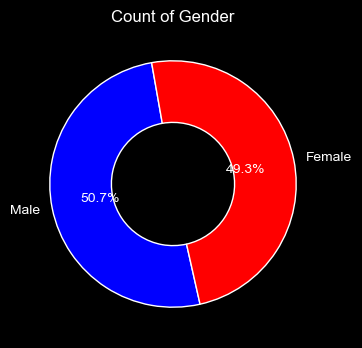

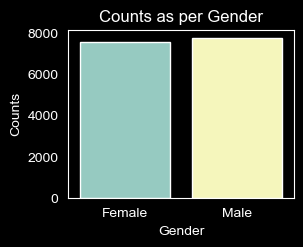

In [27]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(4,4))
gender_counts = cus_data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=100, colors=["blue", "red"], wedgeprops={'width':0.5})
plt.title("Count of Gender")
plt.show()

plt.subplot(2, 2, 2)

sns.countplot(x=cus_data["Gender"], data=cus_data, hue="Gender")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Counts as per Gender")

plt.show()

In [28]:
cus_data

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-01-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-01-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-01-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-01-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-01-19
...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,Texas,United States,North America,1936-01-25
15262,2099618,Male,Justin Solórzano,Mclean,Virginia,United States,North America,1992-01-16
15263,2099758,Male,Svend Petrussen,Wilmington,North Carolina,United States,North America,1937-01-09
15264,2099862,Female,Lorenza Rush,Riverside,California,United States,North America,1937-01-12


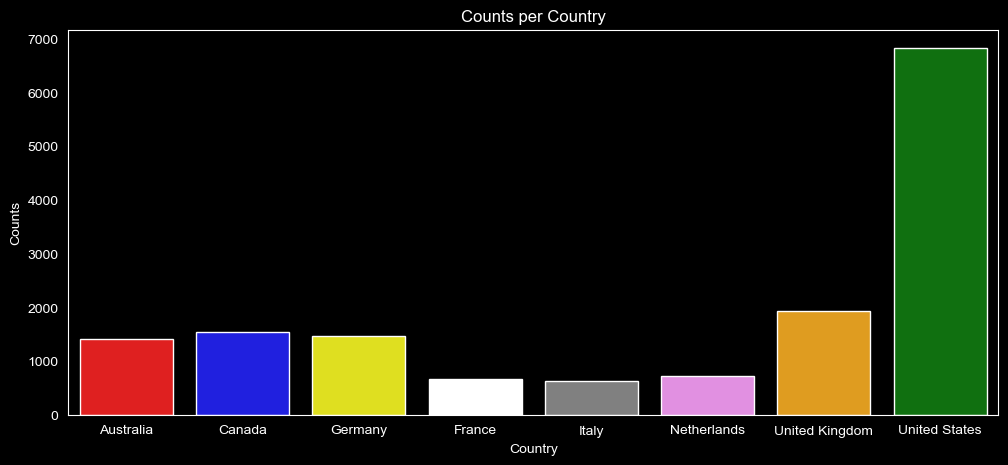

In [29]:
# Set the dark background and grid style
sns.set_style("dark")
plt.style.use("dark_background")

unique_countries = cus_data["Country"].nunique()
custom_colors = ['red', 'blue', 'yellow', 'white', 'grey', 'violet', 'orange', 'green']#[:unique_countries]

# Set up the figure size
plt.figure(figsize=(12, 5))
sns.countplot(x="Country", hue="Country", data=cus_data, palette=custom_colors, dodge=False)
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts per Country")
plt.legend([], [], frameon=False)
plt.show()


# Exchange Rate file

In [31]:
ex_data = pd.read_csv("Exchange_Rates.csv")

In [32]:
ex_data

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [33]:
ex_data.rename(columns={"Currency":"Currency Code"},inplace=True)
ex_data['Date'] = pd.to_datetime(ex_data['Date'], format="%m/%d/%Y", errors='coerce')

In [34]:
ex_data

,Date,Currency Code,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [35]:
ex_data.isnull().sum()

Date             0
Currency Code    0
Exchange         0
dtype: int64

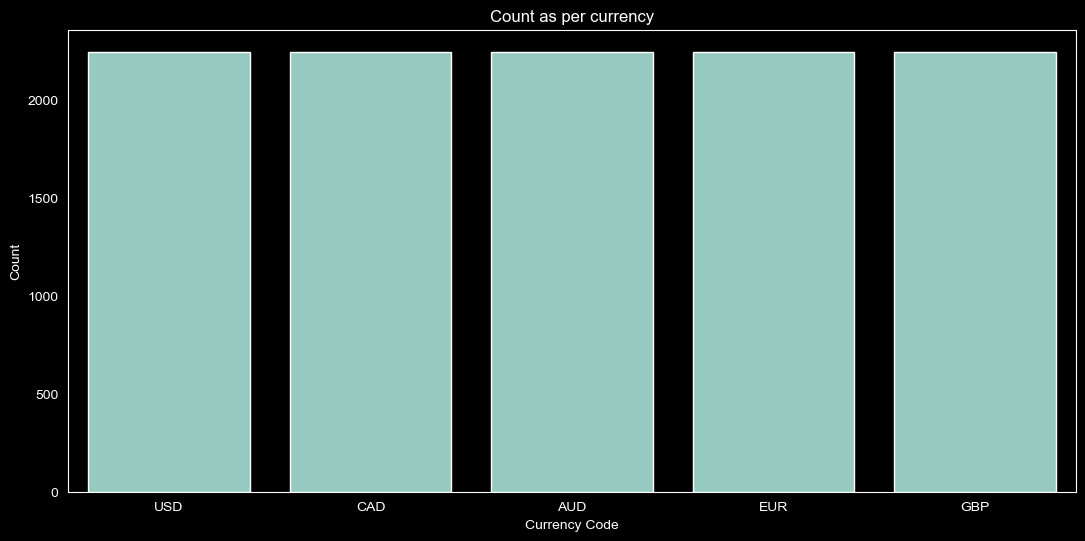

In [36]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(13, 6))
sns.countplot(data=ex_data, x='Currency Code')

plt.xlabel("Currency Code")
plt.ylabel("Count")
plt.title("Count as per currency")

plt.show()


# Stores file

In [38]:
st_data = pd.read_csv("Stores.csv")

In [39]:
st_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [40]:
st_data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [41]:
st_data.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [42]:
st_data['Open Date'] = pd.to_datetime(st_data['Open Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [43]:
st_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [44]:
st_data = st_data.replace({np.nan: None})
print(st_data)

    StoreKey        Country                         State Square Meters  \
0          1      Australia  Australian Capital Territory         595.0   
1          2      Australia            Northern Territory         665.0   
2          3      Australia               South Australia        2000.0   
3          4      Australia                      Tasmania        2000.0   
4          5      Australia                      Victoria        2000.0   
..       ...            ...                           ...           ...   
62        63  United States                          Utah        2000.0   
63        64  United States                 Washington DC        1330.0   
64        65  United States                 West Virginia        1785.0   
65        66  United States                       Wyoming         840.0   
66         0         Online                        Online          None   

     Open Date  
0   2008-01-01  
1   2008-01-12  
2   2012-01-07  
3   2010-01-01  
4   2015-12-09

# Product file

In [46]:
pro_data = pd.read_csv("Products.csv")

In [47]:
pro_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [48]:
pro_data.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [49]:
pro_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [50]:
pro_data.drop(['SubcategoryKey'], axis =1, inplace=True)

In [51]:
pro_data["Unit Cost USD"] = pro_data["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
pro_data["Unit Price USD"] = pro_data["Unit Price USD"].str.replace("$", "").str.replace(",", "")
pro_data["Unit Price USD"] = pro_data["Unit Price USD"].astype(float)
pro_data["Unit Cost USD"] = pro_data["Unit Cost USD"].astype(float)

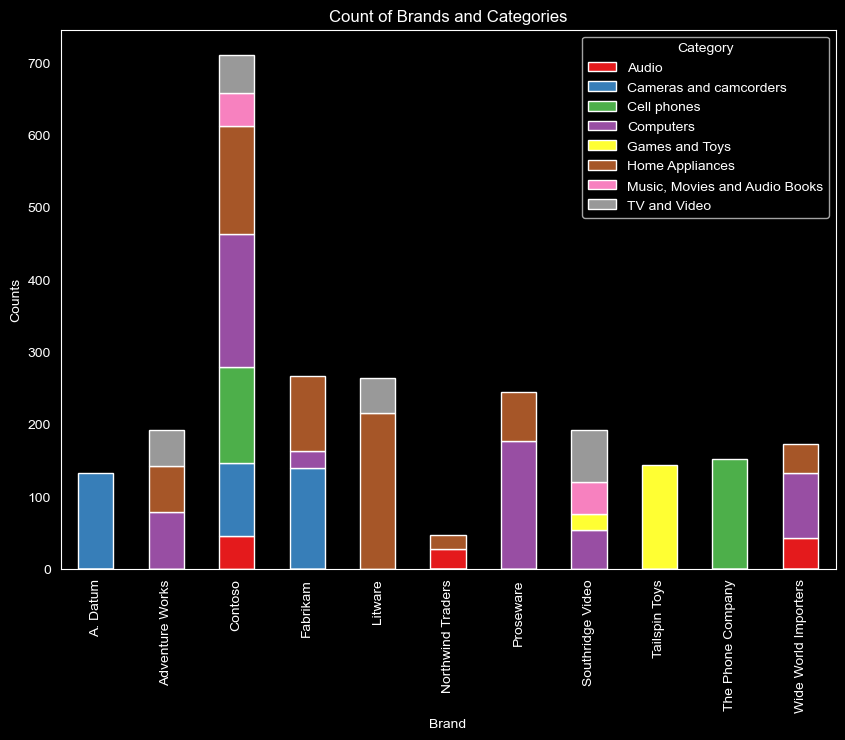

In [52]:

brand_category = pro_data.groupby(['Brand', 'Category']).size().unstack().fillna(0)
brand_category.plot(kind='bar', stacked=True, figsize=(10, 7), colormap="Set1")
plt.title("Count of Brands and Categories")
plt.xlabel("Brand")
plt.ylabel("Counts")
plt.legend(title="Category")
plt.show()


# My SQL Connector

In [65]:

conn=mysql.connector.connect(host="localhost", user="root", password="root123",database="sales_cust")
my_cursor = conn.cursor()
my_cursor.execute("CREATE DATABASE IF NOT EXISTS sales_cust")
print("database created successfully")

database created successfully


In [67]:
# In customer column birthday column is not correct so droppe exitsing column and inserted new column
with conn.cursor() as cursor:
    
    cursor.execute("DROP TABLE IF EXISTS customer_details")

conn.commit()
conn.close()

In [77]:
#sales table creation
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root123",
    database="sales_cust"
)

if mydb.is_connected():
    print("Connected to MySQL Database")

# Create a cursor
my_cursor = mydb.cursor()

# Execute table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_details(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date VARCHAR(255),
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  StoreKey INT,
                  ProductKey INT,
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')

print("Table Created successfully")



Connected to MySQL Database
Table Created successfully


In [79]:
#insert values into sales table
insert_query ='''INSERT INTO sales_details(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=data.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [81]:
#customer table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_details(
                  CustomerKey INT,
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(300),
                  Birthday VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [83]:
insert_query = '''INSERT INTO customer_details(
                  CustomerKey,
                  Gender,
                  Name,
                  City,
                  State,
                  Country,
                  Continent,
                  Birthday
                  )
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s)'''
data = cus_data.values.tolist()
my_cursor.executemany(insert_query, data)
print("Inserted successfully")


Inserted successfully


In [85]:
# exchange table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_details(
                  Date VARCHAR(255),
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [87]:
# insert values into exchange table
insert_query ='''INSERT INTO exchange_details(
                  Date,
                 Currency_Code,
                  Exchange)
                  VALUES (%s, %s, %s)'''
data=ex_data.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [88]:
#store table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS stores_details(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [89]:
##insert values into Store table
insert_query ='''INSERT INTO stores_details(
                 StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''
data=st_data.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


In [93]:
# create Products table 
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_details(
                  ProductKey INT,
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD FLOAT,
                  Unit_Price_USD FLOAT,
                  Subcategory VARCHAR(255),
                  CategoryKey VARCHAR(255),
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [95]:
#insert values into Products table
insert_query ='''INSERT INTO product_details(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data=pro_data.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


# 10 Query

In [98]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)


def dataframe_conn (query, connection):
    cursor = connection.cursor()
    cursor.execute(query)
    columns = [col[0] for col in cursor.description] 
    data = cursor.fetchall()  
    cursor.close()
    return pd.DataFrame(data, columns=columns)  


customer_details = dataframe_conn("SELECT * FROM customer_details", conn)
exchange_details = dataframe_conn("SELECT * FROM exchange_details", conn)
product_details = dataframe_conn("SELECT * FROM product_details", conn)
sales_details = dataframe_conn("SELECT * FROM sales_details", conn)
stores_details = dataframe_conn("SELECT * FROM stores_details", conn)

# Close the connection
conn.close()


In [99]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)

# Initialize cursor
cursor = conn.cursor()

try:
    # 1. Overall female count
    cursor.execute("SELECT COUNT(Gender) AS Female_count FROM customer_details WHERE Gender = 'Female'")
    female_count = cursor.fetchone()[0]
    print("Female count:", female_count)
    
       
finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


Female count: 7514


In [102]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 2. Overall male count
    cursor.execute("SELECT COUNT(Gender) AS Male_count FROM customer_details WHERE Gender = 'Male'")
    male_count = cursor.fetchone()[0]
    print("Male count:", male_count)
    
finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()
    
   

Male count: 7742


In [104]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 3. Count of customers in each country
    cursor.execute("""
        SELECT sd.Country, COUNT(DISTINCT c.CustomerKey) AS customer_count 
        FROM sales_details c 
        JOIN stores_details sd ON c.StoreKey = sd.StoreKey
        GROUP BY sd.Country 
        ORDER BY customer_count DESC
    """)
    country_customer_counts = cursor.fetchall()
    print("Customer count by country:")
    for row in country_customer_counts:
        print(row)
    
finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()

Customer count by country:
('United States', 5179)
('Online', 4547)
('United Kingdom', 1424)
('Canada', 1042)
('Germany', 1008)
('Australia', 657)
('Netherlands', 483)
('Italy', 475)
('France', 389)


In [105]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 4. Overall count of customers
    cursor.execute("SELECT COUNT(DISTINCT CustomerKey) AS customer_count FROM sales_details")
    total_customers = cursor.fetchone()[0]
    print("Total customers:", total_customers)

finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


Total customers: 11887


In [108]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 5. Count of stores in each country
    cursor.execute("""
        SELECT Country, COUNT(StoreKey) 
        FROM stores_details
        GROUP BY Country 
        ORDER BY COUNT(StoreKey) DESC
    """)
    stores_by_country = cursor.fetchall()
    print("Stores by country:")
    for row in stores_by_country:
        print(row)
    


finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


Stores by country:
('United States', 96)
('Germany', 36)
('France', 28)
('United Kingdom', 28)
('Australia', 24)
('Canada', 20)
('Netherlands', 20)
('Italy', 12)
('Online', 4)


In [118]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)

cursor = conn.cursor()

try:
    cursor.execute("""
        SELECT s.StoreKey, sd.Country, SUM(pd.Unit_Price_USD * s.Quantity) AS total_sales_amount 
        FROM product_details pd
        JOIN sales_details s ON pd.ProductKey = s.ProductKey
        JOIN stores_details sd ON s.StoreKey = sd.StoreKey
        GROUP BY s.StoreKey, sd.Country
    """)
    
    store_sales = cursor.fetchall()
    
    print("Store-wise sales:")
    for row in store_sales:
        print(row)

finally:
    cursor.close()
    conn.close()


Store-wise sales:
(0, 'Online', 300677542.4586475)
(1, 'Australia', 6973734.59941864)
(2, 'Australia', 129996.0011100769)
(4, 'Australia', 11279686.728086472)
(5, 'Australia', 22669148.416814804)
(6, 'Australia', 9924254.392690659)
(8, 'Canada', 27827938.778543472)
(9, 'Canada', 33253802.340402603)
(10, 'Canada', 27839511.58411503)
(12, 'France', 4533929.993305206)
(13, 'France', 4349213.399562836)
(14, 'France', 3044046.5893363953)
(15, 'France', 5365994.373865128)
(16, 'France', 5193824.376983643)
(17, 'France', 4688302.196674347)
(18, 'France', 5067098.977957964)
(19, 'Germany', 14234762.94219017)
(20, 'Germany', 11708330.999346972)
(21, 'Germany', 10865345.397598743)
(22, 'Germany', 16167413.386545181)
(23, 'Germany', 14371734.594812393)
(24, 'Germany', 18085349.96266365)
(26, 'Germany', 7222556.997699738)
(27, 'Germany', 14031309.535160065)
(28, 'Italy', 4411419.0004348755)
(29, 'Italy', 22459378.780517578)
(30, 'Italy', 19415625.585272312)
(31, 'Netherlands', 8976817.800807953)
(

In [120]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 7. Overall selling amount
    cursor.execute("""
        SELECT SUM(Unit_Price_USD * sd.Quantity) AS total_sales_amount 
        FROM product_details pd
        JOIN sales_details sd ON pd.ProductKey = sd.ProductKey
    """)
    total_sales_amount = cursor.fetchone()[0]
    print("Total selling amount:", total_sales_amount)

finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


Total selling amount: 355596048.2728341


In [122]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 8. Brand count
    cursor.execute("SELECT Brand, COUNT(Brand) AS brand_count FROM product_details GROUP BY Brand")
    brand_counts = cursor.fetchall()
    print("Brand counts:")
    for row in brand_counts:
        print(row)


finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


Brand counts:
('Contoso', 2130)
('Wide World Importers', 519)
('Northwind Traders', 141)
('Adventure Works', 576)
('Southridge Video', 576)
('Litware', 792)
('Fabrikam', 801)
('Proseware', 732)
('A. Datum', 396)
('The Phone Company', 456)
('Tailspin Toys', 432)


In [126]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
     # 9. Cost price, selling price difference, and profit percentage
    cursor.execute("""
               SELECT Unit_price_USD, Unit_Cost_USD, 
               ROUND((Unit_price_USD - Unit_Cost_USD), 2) AS diff,
               ROUND(((Unit_price_USD - Unit_Cost_USD) / Unit_Cost_USD) * 100, 2) AS profit_percent
        FROM product_details
    """)
    profit_data = cursor.fetchall()
    #print("Profit data (cost price, selling price difference, and profit percent):")
    #for row in profit_data:
        #print(row)


finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


In [128]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)
cursor = conn.cursor()
try:
    # 10. Brand-wise selling amount
    cursor.execute("""
        SELECT Brand, ROUND(SUM(Unit_price_USD * sd.Quantity), 2) AS sales_amount
        FROM product_details pd 
        JOIN sales_details sd ON pd.ProductKey = sd.ProductKey 
        GROUP BY Brand
    """)
    brand_sales = cursor.fetchall()
    print("Brand-wise sales amounts:")
    for row in brand_sales:
        print(row)


finally:
    # Close the cursor and connection
    cursor.close()
    conn.close()


Brand-wise sales amounts:
('Contoso', 68721534.25)
('A. Datum', 9426952.48)
('Adventure Works', 74014004.65)
('Fabrikam', 43847208.9)
('Wide World Importers', 59635339.23)
('Tailspin Toys', 4337895.86)
('Southridge Video', 16211969.2)
('Litware', 17135798.69)
('Proseware', 20207003.09)
('The Phone Company', 34177740.0)
('Northwind Traders', 7880601.92)


# Querying and Merging Multiple Tables Convert as CSV file

In [134]:
conn = mysql.connector.connect(
    host='localhost',       
    user="root",    
    password='root123',
    database='sales_cust'
)


def dataframe_conn (query, connection):
    cursor = connection.cursor()
    cursor.execute(query)
    columns = [col[0] for col in cursor.description] 
    data = cursor.fetchall()  
    cursor.close()
    return pd.DataFrame(data, columns=columns)  


customer_details = dataframe_conn("SELECT * FROM customer_details", conn)
exchange_details = dataframe_conn("SELECT * FROM exchange_details", conn)
product_details = dataframe_conn("SELECT * FROM product_details", conn)
sales_details = dataframe_conn("SELECT * FROM sales_details", conn)
stores_details = dataframe_conn("SELECT * FROM stores_details", conn)

# Close the connection
conn.close()
